In [6]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000000  # number of buses
tau = 10  # average minutes between arrivals

rand = np.random.RandomState(42)  # universal random seed
bus_arrival_times = N * tau * np.sort(rand.rand(N))

In [2]:
intervals = np.diff(bus_arrival_times)
intervals.mean()

9.99998796015184

это среднее значение интералов прибытие автобусов

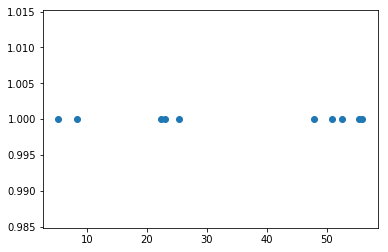

In [10]:
plt.scatter(bus_arrival_times[:10], np.ones(10))

времена прибытий 10 автобусов. Т.к. процесс пуассоновский - т.е. прибытие следующего автобуса никак не связанно с прибытием предыдущего получается что 10 автобусов уложились в ~60  минут, но в среднем по всем 1 млн автобусам интервал будет 10х 1 000 000. Вот ниже пример для 100 автобусов и интервал уже видно, что равен 10х 100. После этой картинки (первой), в принципе, становится понятно почему может быть среднее ожидание 10 мин у пассажира

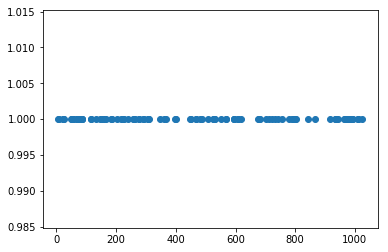

In [11]:
plt.scatter(bus_arrival_times[:100], np.ones(100))

дальше берем 1 000 000 пассажиров и распределяем по времени от 0 до 10х 1 000 000

In [4]:
n_passengers=1000000
rand = np.random.RandomState(8675309)

arrival_times = np.asarray(bus_arrival_times)
passenger_times = arrival_times.max() * rand.rand(n_passengers)

# find the index of the next bus for each simulated passenger
i = np.searchsorted(arrival_times, passenger_times, side='right')

wait_time = arrival_times[i] - passenger_times

считаем среднее время ожидания

In [5]:
wait_time.mean()

10.001584206227317

## теперь если бы автобусы приходили ровно каждые 10 мин

In [12]:
rand = np.random.RandomState(42)  # universal random seed
bus_arrival_times = np.arange(0,N,tau)

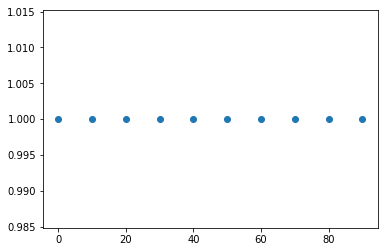

In [13]:
plt.scatter(bus_arrival_times[:10], np.ones(10))

In [14]:
n_passengers=1000000
rand = np.random.RandomState(8675309)

arrival_times = np.asarray(bus_arrival_times)
passenger_times = arrival_times.max() * rand.rand(n_passengers)

# find the index of the next bus for each simulated passenger
i = np.searchsorted(arrival_times, passenger_times, side='right')

wait_time = arrival_times[i] - passenger_times
wait_time.mean()

4.997489757072356

## а теперь если бы мы зашумляли предыдущий пример нормальным шумом со средней 0 и дисперсией 2, а не брали бы равномерное распределение

In [36]:
rand = np.random.RandomState(42)  # universal random seed
bus_arrival_times = np.arange(0,N*tau,tau)
rand_noise = np.random.randn(N)*2
bus_arrival_times = bus_arrival_times.astype(np.float64) + rand_noise

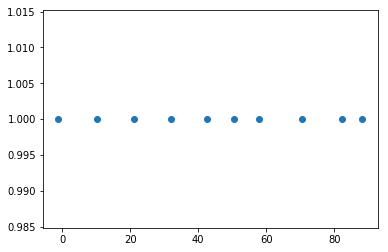

In [37]:
plt.scatter(bus_arrival_times[:10], np.ones(10))

In [38]:
n_passengers=1000000
rand = np.random.RandomState(8675309)

arrival_times = np.asarray(bus_arrival_times)
passenger_times = arrival_times.max() * rand.rand(n_passengers)

# find the index of the next bus for each simulated passenger
i = np.searchsorted(arrival_times, passenger_times, side='right')

wait_time = arrival_times[i] - passenger_times
wait_time.mean()

5.400933230078805

видно что значение далеко от 10 но уже чуть больше 5

# короче вопрос времени ожидания это вопрос распределения диапазонов прибытия  

посмтроим график распределения прибытий первого случая

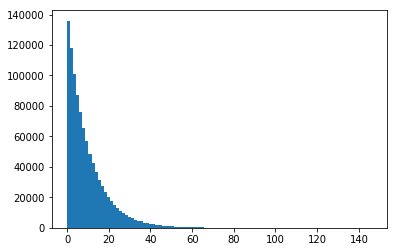

In [40]:
_ = plt.hist(intervals,100)

видно, что это не нормальное распределение, а как раз ближе к пуассоновскому, а точнее как утверждает автор к бетта распределению.
хотя стреднее действительно 10 мин

ну и понятно что в последнем случае это будет нормальное распределение

# спасибо за внимание 